In [30]:
import pandas
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
import pydotplus

music_data_frame = pandas.read_csv('data/Music Data.csv')
music_data_frame

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [31]:
# features = music_data_frame.drop(['genre'])

# all but last column as the features
features = music_data_frame.iloc[:, 0:-1]
features

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [32]:
# label = music_data_frame['genre']

# last column as the label
label = music_data_frame.iloc[:, -1]
label

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

In [33]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(features, label)

input_set_1 = [21, 1]
input_set_2 = [22, 0]

decision_tree_model.predict([input_set_1, input_set_2])

array(['HipHop', 'Dance'], dtype=object)

In [34]:
# test accuracy

# splitting the data, 80% used for training and 20% used for testing
features_for_training, features_for_testing, labels_for_training, labels_for_testing =train_test_split(features, label, test_size=0.2)

# using the 80% to train model
decision_tree_model.fit(features_for_training, labels_for_training)

# using the 20% for testing/predictions
model_predictions = decision_tree_model.predict(features_for_testing)
accuracy_score(labels_for_testing, model_predictions)

1.0

In [35]:
# train and store model

decision_tree_model.fit(features, label)
joblib.dump(decision_tree_model, 'models/Decision_Tree_Model.joblib')

['models/Decision_Tree_Model.joblib']

[Text(209.25, 190.26, 'age <= 30.5\ngini = 0.778\nsamples = 18\nvalue = [3, 6, 3, 3, 3]\nclass = Classical'),
 Text(167.4, 135.9, 'gender <= 0.5\ngini = 0.75\nsamples = 12\nvalue = [3, 0, 3, 3, 3]\nclass = Acoustic'),
 Text(83.7, 81.53999999999999, 'age <= 25.5\ngini = 0.5\nsamples = 6\nvalue = [3, 0, 3, 0, 0]\nclass = Acoustic'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0]\nclass = Dance'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0]\nclass = Acoustic'),
 Text(251.10000000000002, 81.53999999999999, 'age <= 25.5\ngini = 0.5\nsamples = 6\nvalue = [0, 0, 0, 3, 3]\nclass = HipHop'),
 Text(209.25, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0]\nclass = HipHop'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3]\nclass = Jazz'),
 Text(251.10000000000002, 135.9, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0, 0]\nclass = Classical')]

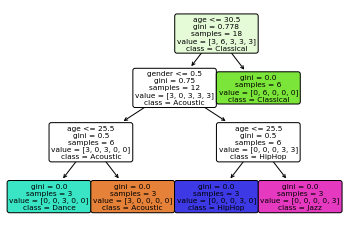

In [51]:
plot_tree(decision_tree_model,
          feature_names=list(music_data_frame)[0:-1],
          class_names=sorted(label.unique()),
          rounded=True,
          filled=True)
